In [1]:
import os
import sys
import shutil
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from shutil import copyfile
%matplotlib inline

sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants

In [75]:
atlas_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine_zflip_2umiso.nii"
atlas = np.asarray(nib.load(atlas_path).get_data().squeeze(), dtype='float32')
#atlas = np.swapaxes(atlas,0,1)
print(atlas.shape)
atlas = ants.from_numpy(atlas)
atlas.set_spacing((2,2,2))


(314, 146, 91)


In [76]:
non_myr_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20220421_make_nonmyr_meanbrain/syn_6.nii"
non_myr = np.asarray(nib.load(non_myr_path).get_data().squeeze(), dtype='float32')
#non_myr = np.swapaxes(non_myr,0,1)
print(non_myr.shape)
non_myr = ants.from_numpy(non_myr)
non_myr.set_spacing((2,2,2))

(333, 166, 121)


In [2]:
non_myr_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20220421_make_nonmyr_meanbrain/syn_6.nii"
non_myr_manual_edit = np.asarray(nib.load(non_myr_path).get_data().squeeze(), dtype='float32')
#non_myr_manual_edit = np.swapaxes(non_myr_manual_edit,0,1)
non_myr_manual_edit[:,:,-40:] = non_myr_manual_edit[:,:,-40:]/8 #5 is good
#non_myr_manual_edit[50:-50,100:-100,25:75] = non_myr_manual_edit[50:-50,100:-100,25:75]*5 #5 is good
print(non_myr_manual_edit.shape)
non_myr_manual_edit = ants.from_numpy(non_myr_manual_edit)
non_myr_manual_edit.set_spacing((2,2,2))

(333, 166, 121)


/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [ ]:
nib.Nifti1Image(moco['warpedmovout'].numpy(), np.eye(4)).to_filename(save_file)

In [3]:
non_myr_manual_edit

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (333, 166, 121)
	 Spacing    : (2.0, 2.0, 2.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

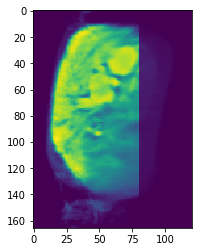

In [79]:
plt.imshow(non_myr_manual_edit.numpy()[200,:,:])

In [12]:
# affine_manual_edit = ants.registration(fixed=atlas, moving=non_myr_manual_edit, type_of_transform='Affine')

# good_affine = ants.apply_transforms(fixed=atlas, moving=non_myr, transformlist=affine_manual_edit['fwdtransforms']) 

# moco = ants.registration(fixed=atlas, moving=good_affine, type_of_transform='SyNOnly')


In [80]:
manual_edit = ants.registration(fixed=atlas, moving=non_myr_manual_edit, type_of_transform='SyN')
moco = ants.apply_transforms(fixed=atlas, moving=non_myr, transformlist=manual_edit['fwdtransforms']) 


In [81]:
manual_edit['fwdtransforms']

['/tmp/tmpfooz88oy1Warp.nii.gz', '/tmp/tmpfooz88oy0GenericAffine.mat']

In [82]:
save_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20220421_make_nonmyr_meanbrain'
fwdtransformlist = manual_edit['fwdtransforms']
fwdtransforms_save_dir = os.path.join(save_directory, '{}-to-{}_fwdtransforms'.format('nonmyr', 'myr'))
fwdtransforms_save_dir += '_2umiso'
if not os.path.exists(fwdtransforms_save_dir):
    os.mkdir(fwdtransforms_save_dir)
for source_path in fwdtransformlist:
    source_file = source_path.split('/')[-1]
    target_path = os.path.join(fwdtransforms_save_dir, source_file)
    copyfile(source_path, target_path)

In [83]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20220421_make_nonmyr_meanbrain/non_myr_2_fdaatlas_40_8.nii'
nib.Nifti1Image(moco.numpy(), np.eye(4)).to_filename(save_file)

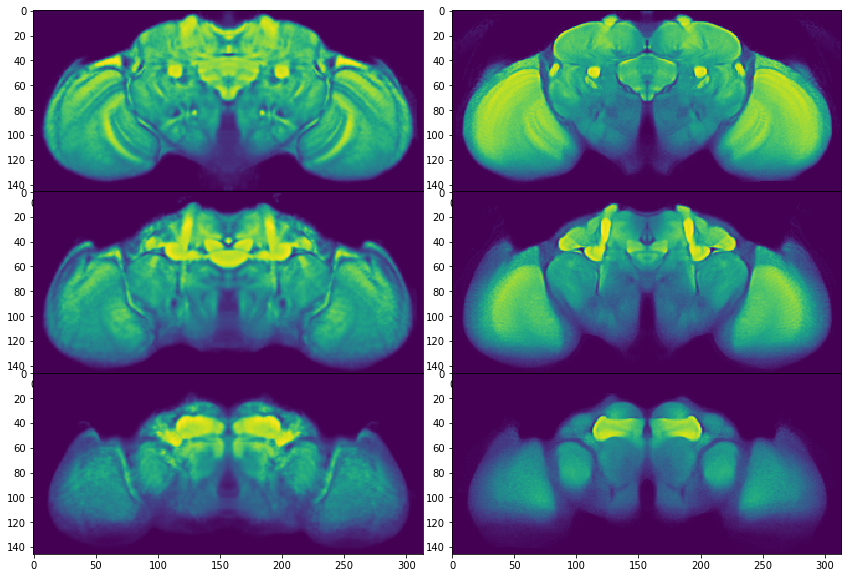

In [67]:
plt.figure(figsize=(15,10))

z=40
plt.subplot(3,2,1)
plt.imshow(moco.numpy()[:,:,z])
plt.subplot(3,2,2)
plt.imshow(atlas.numpy()[:,:,z])

z=50
plt.subplot(3,2,3)
plt.imshow(moco.numpy()[:,:,z])
plt.subplot(3,2,4)
plt.imshow(atlas.numpy()[:,:,z])

z=60
plt.subplot(3,2,5)
plt.imshow(moco.numpy()[:,:,z])
plt.subplot(3,2,6)
plt.imshow(atlas.numpy()[:,:,z])

plt.subplots_adjust(wspace=0,hspace=0)

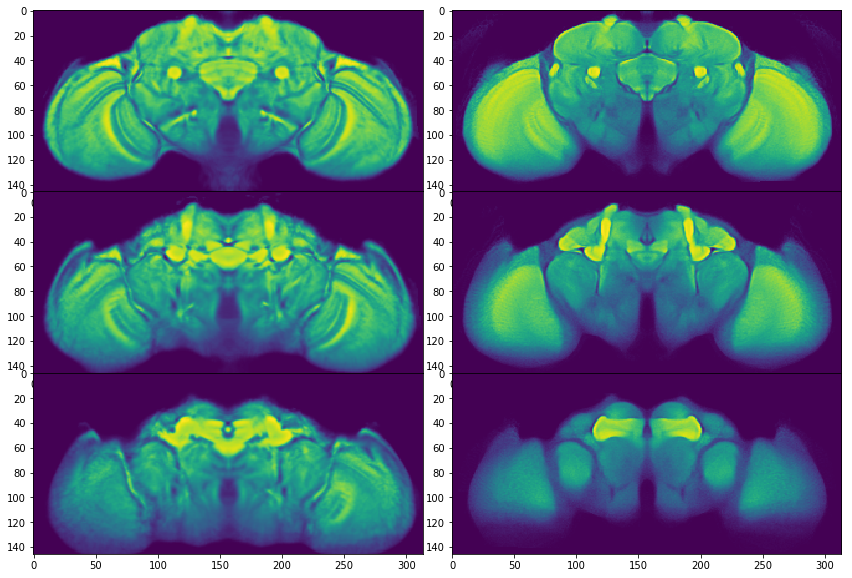

In [51]:
#-50,8
plt.figure(figsize=(15,10))

z=40
plt.subplot(3,2,1)
plt.imshow(moco.numpy()[:,:,z])
plt.subplot(3,2,2)
plt.imshow(atlas.numpy()[:,:,z])

z=50
plt.subplot(3,2,3)
plt.imshow(moco.numpy()[:,:,z])
plt.subplot(3,2,4)
plt.imshow(atlas.numpy()[:,:,z])

z=60
plt.subplot(3,2,5)
plt.imshow(moco.numpy()[:,:,z])
plt.subplot(3,2,6)
plt.imshow(atlas.numpy()[:,:,z])

plt.subplots_adjust(wspace=0,hspace=0)

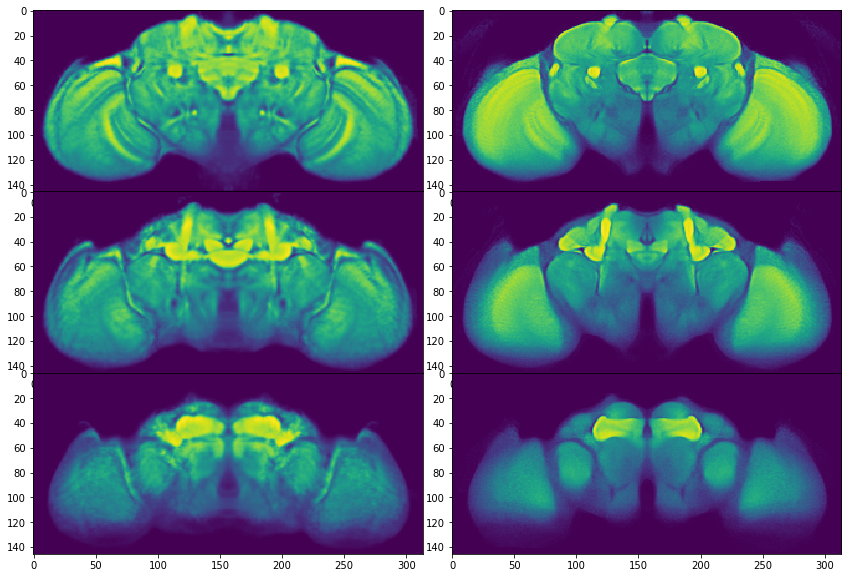

In [47]:
#-30,8
plt.figure(figsize=(15,10))

z=40
plt.subplot(3,2,1)
plt.imshow(moco.numpy()[:,:,z])
plt.subplot(3,2,2)
plt.imshow(atlas.numpy()[:,:,z])

z=50
plt.subplot(3,2,3)
plt.imshow(moco.numpy()[:,:,z])
plt.subplot(3,2,4)
plt.imshow(atlas.numpy()[:,:,z])

z=60
plt.subplot(3,2,5)
plt.imshow(moco.numpy()[:,:,z])
plt.subplot(3,2,6)
plt.imshow(atlas.numpy()[:,:,z])

plt.subplots_adjust(wspace=0,hspace=0)

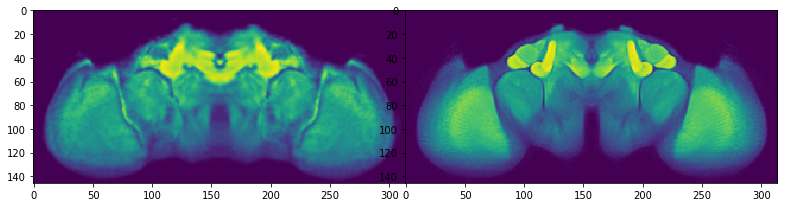

In [40]:
#-30,5
plt.figure(figsize=(20,10))
#plt.subplot(1,3,1)
#plt.imshow(good_affine.numpy()[:,:,40])
plt.subplot(1,3,2)
plt.imshow(moco.numpy()[:,:,53])
plt.subplot(1,3,3)
plt.imshow(atlas.numpy()[:,:,53])
plt.subplots_adjust(wspace=0)

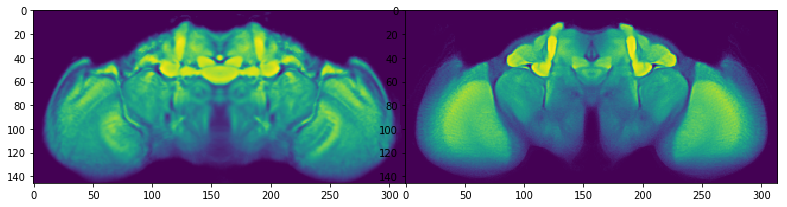

In [26]:
#-40,8
plt.figure(figsize=(20,10))
#plt.subplot(1,3,1)
#plt.imshow(good_affine.numpy()[:,:,40])
plt.subplot(1,3,2)
plt.imshow(moco.numpy()[:,:,50])
plt.subplot(1,3,3)
plt.imshow(atlas.numpy()[:,:,50])
plt.subplots_adjust(wspace=0)

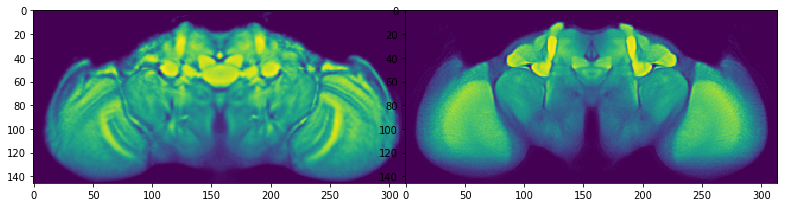

In [21]:
#-60,8
plt.figure(figsize=(20,10))
#plt.subplot(1,3,1)
#plt.imshow(good_affine.numpy()[:,:,40])
plt.subplot(1,3,2)
plt.imshow(moco.numpy()[:,:,50])
plt.subplot(1,3,3)
plt.imshow(atlas.numpy()[:,:,50])
plt.subplots_adjust(wspace=0)

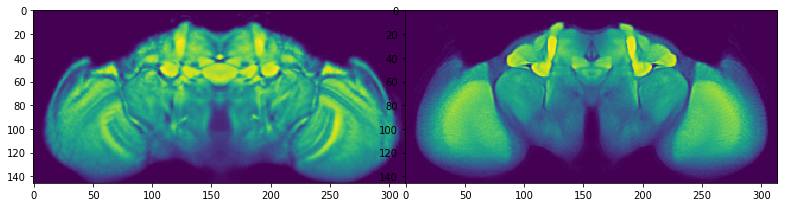

In [18]:
#-50, 8
plt.figure(figsize=(20,10))
#plt.subplot(1,3,1)
#plt.imshow(good_affine.numpy()[:,:,40])
plt.subplot(1,3,2)
plt.imshow(moco.numpy()[:,:,50])
plt.subplot(1,3,3)
plt.imshow(atlas.numpy()[:,:,50])
plt.subplots_adjust(wspace=0)

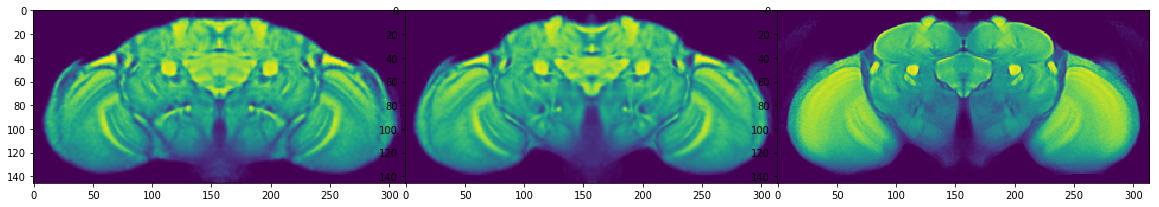

In [159]:
##-60, /5

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(good_affine.numpy()[:,:,40])
plt.subplot(1,3,2)
plt.imshow(moco['warpedmovout'].numpy()[:,:,40])
plt.subplot(1,3,3)
plt.imshow(atlas.numpy()[:,:,40])
plt.subplots_adjust(wspace=0)

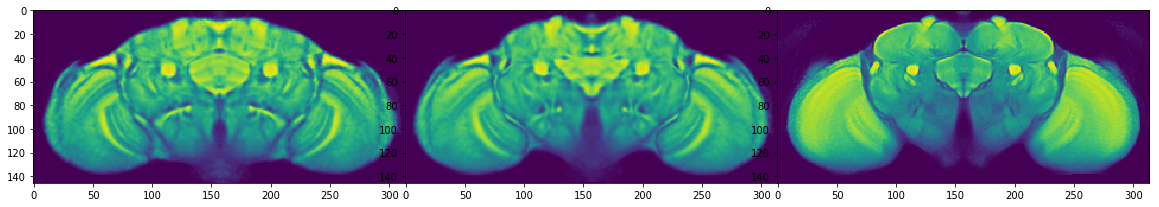

In [144]:
##-50, /5

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(good_affine.numpy()[:,:,40])
plt.subplot(1,3,2)
plt.imshow(moco['warpedmovout'].numpy()[:,:,40])
plt.subplot(1,3,3)
plt.imshow(atlas.numpy()[:,:,40])
plt.subplots_adjust(wspace=0)

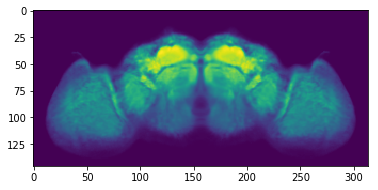

In [14]:
plt.imshow(moco['warpedmovout'].numpy()[:,:,60])